In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [13]:
df = pd.read_csv('diabetes.csv')

In [14]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


### 1. Define data X and y

In [15]:
y = df['Outcome']
X = df.drop(columns=['Outcome'])

### 2. Create training and test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

### 3. Create the classifier

In [21]:
logreg = LogisticRegression(max_iter = 2000)

### 4. Fit the classifier to the training data

In [22]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 5. Predict the labels of the test set

In [23]:
y_pred = logreg.predict(X_test)

### 6. Compute and print the confusion matrix and classification report

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[168  38]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



### 7. Compute predicted probabilities

In [26]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

### 8. Generate ROC curve values

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

### 9. Plot ROC curve

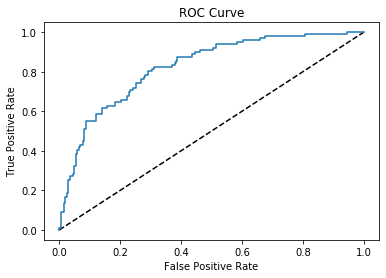

In [29]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### 10. Compute and print AUC score

In [31]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8243384732533791


### 11. Compute cross-validated AUC scores

In [32]:
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

### 12. Print list of AUC scores

In [34]:
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.81240741 0.80777778 0.82555556 0.87283019 0.84471698]
